# Managing state

The notebook is an interactive computing environment. It lets you execute code in a step-by step fashion. This is powerful for thinking through a problem and taking your next steps based on what you see or do in the cell above. But it can lead to some challenging, non-intuitive behaviours if you run cells out of order or multiple times. In this notebook, we capture some "gotchas" and tips for avoiding tying your notebook in a knot. If you have ideas or experiences to contribute here, [contributions to this repository](https://github.com/pangeo-data/jupyter-earth) are welcome! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Variable assignment

Sometimes as you are working, you might do simple computations, updates to a variable. One way to do this is to just over-write the variable name. The danger here is that if you re-run the second or third cell below, the value will update again, which may not be intended. 

If you have a large notebook and update a parameter above, re-run the cells below, this can be easy to miss and generate non-intuitive results. 

In [2]:
a = 2

In [3]:
a *= 2
print(a)

4


In [4]:
a = a*2
print(a)

8


A safer way to do this operation is to create a new variable with a different name. No matter how many times we execute the second cell below, the value will always be `4`

In [5]:
a = 2

In [6]:
a_times_2 = a*2
print(a_times_2)

4


## Scope of functions

The scope of variables assigned at the top level in the notebook (e.g. not inside a function or class) is global. This means you can still use them inside of a function. In the second cell below, we create a sine wave with a given frequency.

In [7]:
frequency = 1

In [8]:
def sketchy_sine_wave(x):
    return np.sin(2*np.pi*frequency*x)

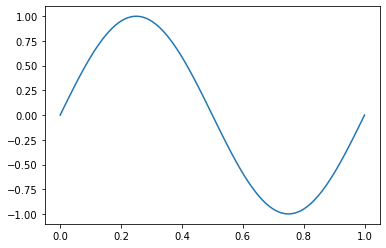

In [9]:
x = np.linspace(0, 1, 100)
plt.plot(x, sketchy_sine_wave(x));

If we change the value of `frequency`, then the the behaviour of `sine_wave` changes. So even though the second cell has code that is identical to the cell above, the output is different. This can be confusing! 

In [10]:
frequency = 2

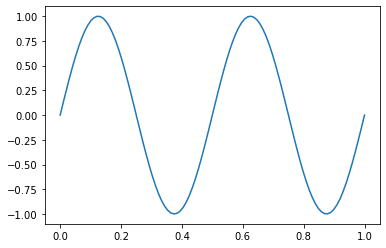

In [11]:
plt.plot(x, sketchy_sine_wave(x));

A safer approach is to keep the scope of variables inside a function local to that function and assign default-values to parameters as appropriate. This will also allow you to much more easily pull functions / classes that you write in the notebook into a python file to create a module if you want to later re-use that code. 

In [12]:
def safer_sine_wave(x, frequency=1):
    return np.sin(2*np.pi*frequency*x)